# MALARIA IN AFRICA (2007-2017)

In [165]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Control display of seaborn data 
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

**DATASET BEFORE CLEANING.**

In [166]:
# Loading the dataset
df = pd.read_csv(r'..\..\resources\datasets\MalariaAfricaDataset.csv')
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,NaN,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,78.12,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,15.70,NaN,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,46.25,NaN,NaN,NaN,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


**ANALYZING THE DATASET.**

In [167]:
# Checking shape of data (rows, columns)
#getting shape of data (rows, columns
df.shape

(594, 27)

In [168]:
# Checking column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [169]:
# Checking data types
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [170]:
# Checking for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [171]:
# Check null values
df.isnull().sum().sort_values(ascending = False)

People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water services (% of population)                      495
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed sanitation services, rural (% of rural population)             484
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
People using safely managed sanitation services, urban  (% of urban population)            462
People using safely managed sanitation services (% of population)                          462
Use of insecticide-treated bed nets (% of under-5 population)                              462
People using safely managed drinking water services, urban (% of urban population)         418
Malaria cases reported                                                                      44
Incidence of malaria (per 1,000 population at risk

In [172]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [173]:
""" 
I filled both the malaria cases reported and incidence of malaria columns with 0s because the two columns each has 44 nulls , 
since each country appears 11 times, there are 4 countries with nulls throughout the 11 years. Therefore I couldn't calculate the mean.
Also I could not just assume any value to be filled in all the 11 spaces for each country. 
"""
df['Malaria cases reported'].fillna(0, inplace=True)
df['Incidence of malaria (per 1,000 population at risk)'].fillna(0, inplace=True)

**Confirmation that the two columns now have no nulls.**

In [174]:
df['Malaria cases reported'].isnull().sum()

0

In [175]:
df['Incidence of malaria (per 1,000 population at risk)'].isnull().sum()

0

**Handling nulls by filling the missing values with the mean of the rows that have data for each particular country.**

In [176]:
eritrea_means = df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
eritrea_data_rows = df.loc[df['Country Name'] == 'Eritrea'].dropna(subset=['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)','Rural population (% of total population)', 'Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'Eritrea', ['Rural population growth (annual %)', 'Urban population (% of total population)', 'Rural population (% of total population)','Urban population growth (annual %)','People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(eritrea_means)

In [177]:
sudan_means = df.loc[df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
sudan_data_rows = df.loc[df['Country Name'] == 'South Sudan'].dropna(subset=['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'South Sudan', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(sudan_means)

In [178]:
car_means = df.loc[df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 
                                                'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']].mean()

# Filter out the rows that have data
car_data_rows = df.loc[df['Country Name'] == 'Central African Republic'].dropna(subset=['People using at least basic drinking water services (% of population)', 
                                                'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']] = df.loc[
    df['Country Name'] == 'Central African Republic', ['People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
                                                'People using at least basic drinking water services, rural (% of rural population)',
                                                'People using at least basic drinking water services, urban (% of urban population)',
                                                'People using at least basic sanitation services, rural (% of rural population)',
                                                'People using at least basic sanitation services, urban  (% of urban population)']
].fillna(car_means)

I filled the remaining nulls available with zero because the columns still having nulls have over 75% of the data with nulls.
Calculating mean like the code earlier would give nulls, since for some particular countries, all the 11 times they appear have nulls.

In [179]:
# Replace NaN with zero
df.fillna(0, inplace=True)

**Confirmation that all columns now have no nulls.**

In [180]:
df.isnull().sum().sort_values(ascending = False) 

Country Name                                                                               0
Rural population (% of total population)                                                   0
longitude                                                                                  0
latitude                                                                                   0
People using at least basic sanitation services, urban  (% of urban population)            0
People using at least basic sanitation services, rural (% of rural population)             0
People using at least basic sanitation services (% of population)                          0
People using at least basic drinking water services, urban (% of urban population)         0
People using at least basic drinking water services, rural (% of rural population)         0
People using at least basic drinking water services (% of population)                      0
Urban population growth (annual %)                                    

In [181]:
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

**Changing the data type of the malaria cases reported to int.**

In [182]:
df['Malaria cases reported'] = df['Malaria cases reported'].astype('int')

**Analyze the reported number of malaria cases to understand the burden of malaria in different countries and over time.**

In [183]:
# Filter out Year and Malaria cases reported.
malaria_cases = df[['Year', 'Malaria cases reported']]
malaria_cases

,Year,Malaria cases reported
0,2007,26
1,2007,1533485
2,2007,0
3,2007,390
4,2007,44246
...,...,...
589,2017,1755577
590,2017,0
591,2017,11667831
592,2017,5505639


In [184]:
# Get total malaria cases per year and highlighting a year with maximum total cases.
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: maroon' if cell else '' for cell in is_min]

totalmalaria_cases = malaria_cases.groupby('Year').sum()

totalmalaria_cases.style.apply(highlight_max)

,Malaria cases reported
Year,
2007,10102341
2008,9508374
2009,14414616
2010,22184760
2011,23002865
2012,39719221
2013,47174959
2014,77028814
2015,92968526


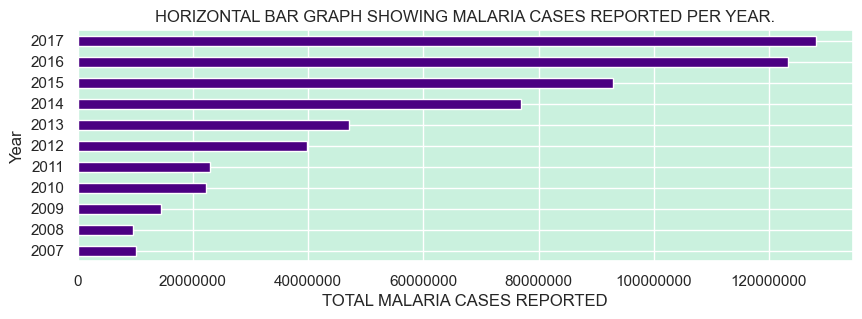

In [185]:
malaria_cases_bar = totalmalaria_cases.plot(kind='barh', align='center', figsize=(10,3), color='indigo', legend =False,
                            title="HORIZONTAL BAR GRAPH SHOWING MALARIA CASES REPORTED PER YEAR.")
# Remove scientific notation from x-axis
plt.ticklabel_format(style='plain', axis='x')

# Set x-axis label
plt.xlabel('TOTAL MALARIA CASES REPORTED')

# Display the plot
plt.show()

In [186]:
#objective of geographical analysis
import folium
# Convert latitude and longitude to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, 
                        geometry=gpd.points_from_xy(df.longitude, df.latitude), 
                        crs='EPSG:4326')

# Create a Folium map centered around Africa
map_center = [0, 25]  # Approximate center of Africa's latitude and longitude
malaria_map = folium.Map(location=map_center, zoom_start=3)

# Add markers to the map for each location with malaria incidence
for idx, row in gdf.iterrows():
    popup_text = f"Country: {row['Country Name']}<br>" \
                 f"Year: {row['Year']}<br>" \
                 f"Incidence of Malaria (per 1,000 population at risk): {row['Incidence of malaria (per 1,000 population at risk)']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(malaria_map)

# Display the map
malaria_map.save('malaria_map.html')  # Save the map as an HTML file


NameError: name 'gpd' is not defined

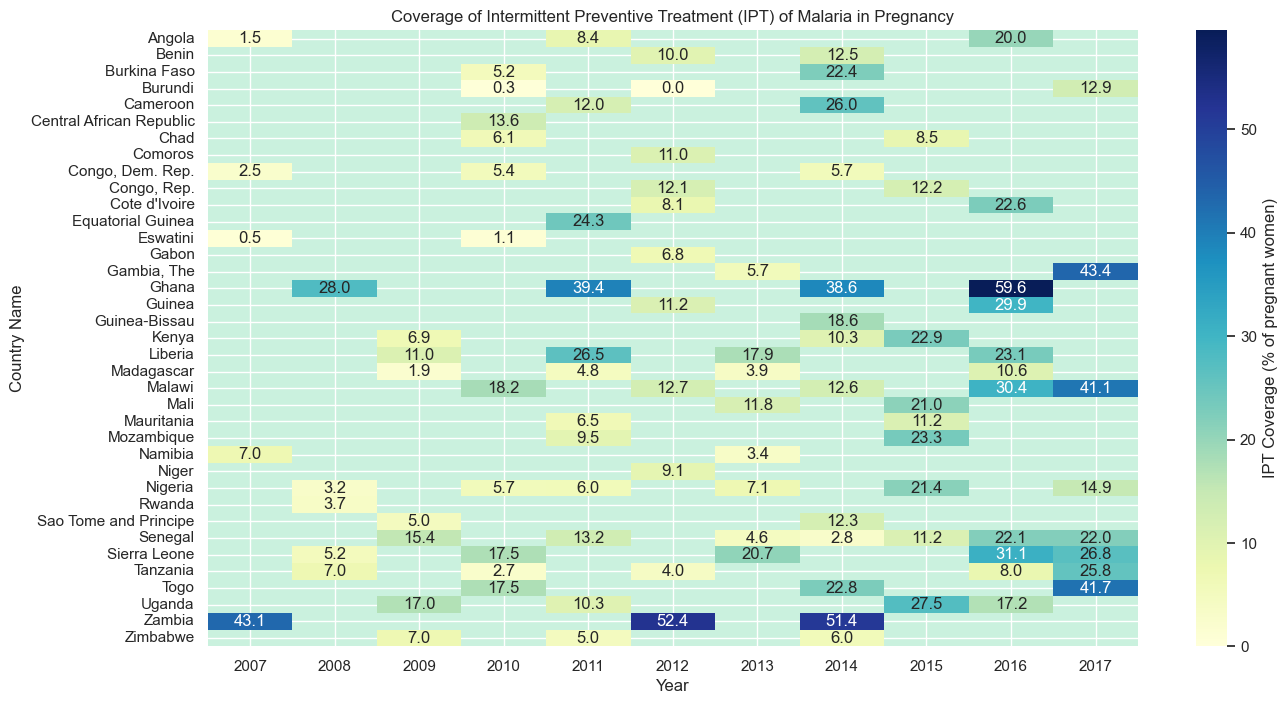

In [ ]:
#objective of Intermittent preventive treatment of malaria in pregnancy(%of pregnanc women)
# Choose relevant columns for visualization
columns_for_heatmap = ['Country Name', 'Year', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)']

# Filter rows related to Malaria in Pregnancy (if available)
# For example, if you have a specific column indicating Malaria in Pregnancy data, use it in the filter:
# data = data[data['Malaria_in_Pregnancy_column'] == 'Yes']

# Pivot the data to create a matrix for heatmap visualization
heatmap_data = data[columns_for_heatmap].pivot_table(
    index='Country Name',
    columns='Year',
    values='Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
    aggfunc='mean'
)

# Create the heatmap using seaborn
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'IPT Coverage (% of pregnant women)'})
plt.title('Coverage of Intermittent Preventive Treatment (IPT) of Malaria in Pregnancy')
plt.xlabel('Year')
plt.ylabel('Country Name')
plt.show()


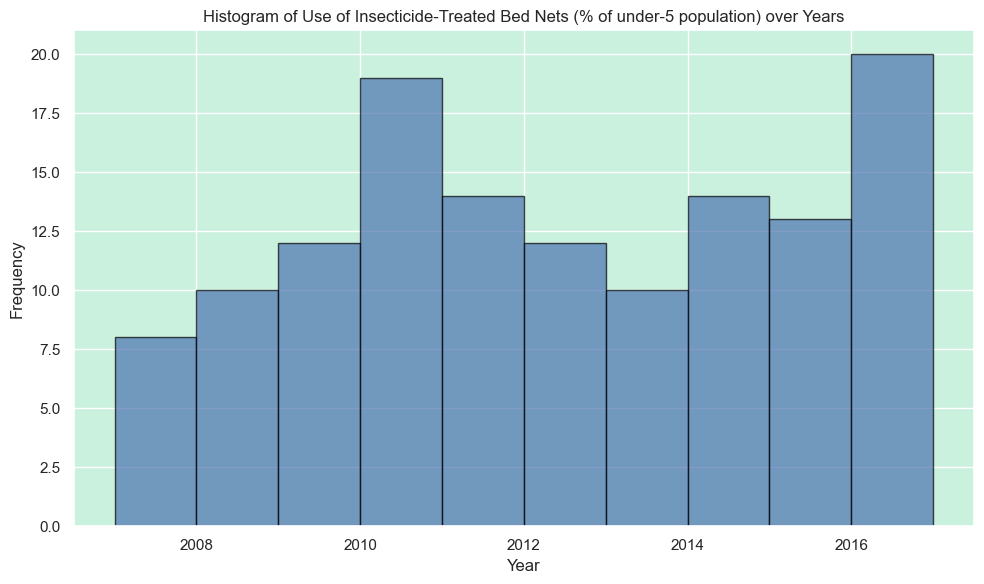

In [ ]:
#use of bed usage histogram
# Choose relevant columns for the histogram
columns_for_histogram = ['Year', 'Use of insecticide-treated bed nets (% of under-5 population)']

# Filter only the rows with non-null values for both columns
data = data.dropna(subset=columns_for_histogram)

# Extract the two columns for the histogram
bed_net_usage = data['Use of insecticide-treated bed nets (% of under-5 population)']
year = data['Year']

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram
plt.hist(year, bins=10, edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Use of Insecticide-Treated Bed Nets (% of under-5 population) over Years')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#printing the mean,standard deviation and frequency
# Choose the relevant column for calculation
bed_net_usage = data['Use of insecticide-treated bed nets (% of under-5 population)']

# Calculate the mean and standard deviation
mean_value = bed_net_usage.mean()
std_dev = bed_net_usage.std()

# Calculate the frequency of each bed net usage value
frequency = bed_net_usage.value_counts()

print("Mean:", mean_value)
print("Standard Deviation:", std_dev)
print("Frequency:")
print(frequency)



Mean: 42.53030303030302
Standard Deviation: 20.157058655665256
Frequency:
Use of insecticide-treated bed nets (% of under-5 population)
26.0    4
56.0    3
38.1    2
69.6    2
45.3    2
       ..
63.6    1
30.3    1
29.4    1
63.7    1
54.6    1
Name: count, Length: 117, dtype: int64


In [ ]:
#for the correlation
# Choose relevant columns for correlation calculation
columns_for_correlation = ['Year', 'Use of insecticide-treated bed nets (% of under-5 population)']

# Filter only the rows with non-null values for both columns
data = data.dropna(subset=columns_for_correlation)

# Extract the two columns for correlation calculation
bed_net_usage = data['Use of insecticide-treated bed nets (% of under-5 population)']
year = data['Year']

# Calculate the correlation coefficient
correlation = bed_net_usage.corr(year)

print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.5310141712631441


In [ ]:
#splitting data into features and labels
X = df.drop('Incidence of malaria (per 1,000 population at risk)', axis=1)  # Adjust 'target_column' accordingly
y = df['Incidence of malaria (per 1,000 population at risk)']


In [ ]:

#splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X_train contains your features and Y_train contains your target values

# Specify which columns are categorical and numerical
categorical_columns =['Country Name', 'Country Code']
numeric_columns = ['Incidence of malaria (per 1,000 population at risk)']

# Create preprocessing pipelines for both categorical and numeric features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_columns),
    ('num', numeric_pipeline, numeric_columns)
])

# Fit and transform the preprocessing on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply the same preprocessing to the test data
X_test_preprocessed = preprocessor.transform(X_test)




In [ ]:
# Transform the testing data using the same preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Predict on the transformed testing data
y_pred = regression_model.predict(X_test_transformed)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 15228.322999436328


In [ ]:
#evaluate model
from sklearn.metrics import mean_squared_error

y_pred = regression_model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 15228.322999436328


In [ ]:
# Predict on the transformed testing data
y_pred = regression_model.predict(X_test_transformed)

# Print the predicted target values
print("Predicted target values:", y_pred)


Predicted target values: [ 173.78612373  162.04308022  -75.56729937  -36.46565365  175.51838105
  291.23756797  228.09086931  499.16867418  225.48635292  114.66122531
  160.38281969  179.9202404   123.59978816  133.62207658  216.36332403
    1.18259714  155.45914541  265.89303515   64.29338412  219.61511839
  211.54550021  -31.35624204  275.62664562  262.73889448   61.63297565
  -35.6486844    68.68801399   68.83130657   52.15791421  271.12756632
  -39.25183742  304.3317109   183.65778606  352.33587946   54.57317692
  280.12890089   83.61860831  276.07891621   -6.22094995  226.91786478
  209.23027377  -41.16788894  335.12240265  128.80117886  207.76595061
  270.03459797   59.23669354  237.01763162  151.81229978  208.27837892
  350.8225237   261.80021553   58.13346412  427.35110967  317.31175302
  112.00135007  221.46403546  245.75967256  -36.28472328  296.56016026
  -15.82206185 -114.01267218  309.40810087  104.62851156  -24.77919354
  360.30711311  311.31740509  277.32547401  112.0643

In [ ]:
#dataset preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Load your data into a DataFrame
data = pd.read_csv(r'..\..\resources\datasets\MalariaAfricaDataset.csv')

# Select features and target variable
X = data.drop('Malaria cases reported', axis=1)  # Features
y = data['Malaria cases reported']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical columns (Country Name and Country Code)
categorical_columns = ['Country Name', 'Country Code']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Get the feature names from the encoder
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create DataFrames for the encoded categorical columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

# Combine the encoded categorical columns with the numerical columns
X_train_final = pd.concat([X_train.drop(categorical_columns, axis=1), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(categorical_columns, axis=1), X_test_encoded_df], axis=1)




In [ ]:

# Load your data into a DataFrame
df = pd.read_csv(r'..\..\resources\datasets\MalariaAfricaDataset.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, :4].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load your data and handle missing values

# Preprocessing pipelines for categorical and numeric columns
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Specify which columns are categorical by their indices
categorical_columns = [0, 1]  # Replace with the actual indices

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_columns)
])

# Load and preprocess your data (assuming you have a NumPy array X)
X_preprocessed = preprocessor.fit_transform(X)

# Print the preprocessed data
print(X_preprocessed)


  (0, 0)	1.0
  (0, 54)	1.0
  (1, 1)	1.0
  (1, 54)	1.0
  (2, 2)	1.0
  (2, 54)	1.0
  (3, 3)	1.0
  (3, 54)	1.0
  (4, 4)	1.0
  (4, 54)	1.0
  (5, 5)	1.0
  (5, 54)	1.0
  (6, 6)	1.0
  (6, 54)	1.0
  (7, 7)	1.0
  (7, 54)	1.0
  (8, 8)	1.0
  (8, 54)	1.0
  (9, 9)	1.0
  (9, 54)	1.0
  (10, 10)	1.0
  (10, 54)	1.0
  (11, 11)	1.0
  (11, 54)	1.0
  (12, 12)	1.0
  :	:
  (581, 64)	1.0
  (582, 42)	1.0
  (582, 64)	1.0
  (583, 43)	1.0
  (583, 64)	1.0
  (584, 44)	1.0
  (584, 64)	1.0
  (585, 45)	1.0
  (585, 64)	1.0
  (586, 46)	1.0
  (586, 64)	1.0
  (587, 47)	1.0
  (587, 64)	1.0
  (588, 48)	1.0
  (588, 64)	1.0
  (589, 49)	1.0
  (589, 64)	1.0
  (590, 50)	1.0
  (590, 64)	1.0
  (591, 51)	1.0
  (591, 64)	1.0
  (592, 52)	1.0
  (592, 64)	1.0
  (593, 53)	1.0
  (593, 64)	1.0
